In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
gwv_data = pd.read_csv('../c46131.csv', sep=',')
gwv_data.head(n=5)

del gwv_data['WSS$']
del gwv_data['WSS$.1']
gwv_data.head(n=5)

,STN_ID,DATE,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,...,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
0,C46131,10/20/1992 12:09,1,49.91,124.99,18,2.31,5.89,2.4,4.8,...,124,12.5,15.2,118,11.9,14.5,998.0,990.1,12.0,10.3
1,C46131,10/20/1992 13:09,1,49.91,124.99,18,2.18,6.92,2.3,4.5,...,140,14.4,17.3,134,13.8,16.9,998.1,990.1,12.8,10.3
2,C46131,10/20/1992 14:09,1,49.91,124.99,18,2.34,6.40,2.4,4.2,...,138,12.8,15.6,132,12.3,15.1,997.7,990.1,12.9,10.2
3,C46131,10/20/1992 15:09,1,49.91,124.99,18,2.02,6.40,2.1,4.1,...,149,11.8,14.1,143,11.3,13.7,999.5,990.1,12.7,10.2
4,C46131,10/20/1992 16:09,1,49.91,124.99,18,1.54,6.40,1.6,3.2,...,178,7.9,10.5,172,7.6,10.1,1001.5,990.1,12.4,10.2


In [85]:
# Making the Date column the index for the data frame
gwv_data = pd.read_csv('../c46131.csv', sep=',', index_col='DATE')

del gwv_data['WSS$']
del gwv_data['WSS$.1']

# Changing the Date to pnadas datetime indicator
gwv_data.index = pd.to_datetime(gwv_data.index)


# Average the data in gwv_data for each month
gwv_monthly = gwv_data.resample('M', how = ('mean'))
gwv_monthly.head(n=5)


,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
1992-10-31,1.498069,49.91,124.99,18,0.639846,3.845676,0.665637,1.353282,13.461390,187.185328,5.591506,7.018919,185.845560,5.377992,6.810425,1010.201158,990.1,10.590347,10.552896
1992-11-30,2.033019,49.91,124.99,18,0.443522,3.438789,0.473113,0.948585,19.895755,173.790881,5.152044,6.367767,175.773585,4.983648,6.170755,1019.930975,990.1,7.952987,9.695440
1992-12-31,2.487138,49.91,124.99,18,0.521350,3.582203,0.552733,1.116077,22.503215,214.059486,5.855627,7.361415,218.347267,5.667685,7.158039,1014.832958,990.1,4.358521,8.273633
1993-01-31,2.770370,49.91,124.99,18,0.384593,3.173941,0.412296,0.841481,24.302222,223.434074,5.042370,6.378074,221.640000,4.872593,6.189037,1016.453185,990.1,3.297037,7.243556
1993-02-28,2.196460,49.91,124.99,18,0.157274,3.007274,0.164425,0.354690,20.306726,207.605310,2.935044,3.775398,209.541593,2.816991,3.657345,1018.012743,990.1,5.536814,7.602655


In [146]:
# Findinge the maximum value of a column in pandas (not part of the assignment, but very useful to know)
gwv_monthly.loc[gwv_monthly['sea_surface_temperature'].idxmax()]

Q_FLAG                                 2.394841
LATITUDE                              49.910000
LONGITUDE                            124.990000
DEPTH                                 18.000000
sig_wave_height                        0.187183
wave_spectrum_peak_period              2.891964
sig_wave_height_bouy                   0.229563
maximum_zero_crossing_wave             0.447421
wave_spectrum_peak_period_bouy        29.358929
wind_direction                       242.488095
wind_speed                             3.397619
wind_gust_speed                        4.115278
wind_direction.1                     244.323413
wind_speed.1                           3.227183
wind_gust_speed.1                      3.938889
sea_level_atmospheric_pressure      1017.810317
sea_level_atmospheric_pressure.1    1017.522222
dry_bulb_air_temperature              18.306151
sea_surface_temperature               19.263889
Name: 1994-08-31 00:00:00, dtype: float64

In [76]:
# Subsetting the monthly averaged data for a three year time period from November 1992 to November 1995
gwv_monthly_1 = gwv_monthly.iloc[:36,]

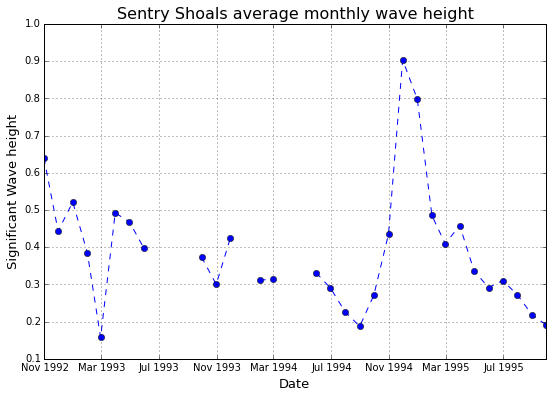

In [143]:
# Setting the figure size
plt.figure(figsize=(9,6))

# Plotting the average monthly significant wave height over the 3 year period from November 1992 to November 1995
plt.plot(gwv_monthly_1.index, gwv_monthly_1.sig_wave_height, marker='o', linestyle='--')

# Labeling the s and y axes
plt.xlabel('Date', fontsize=13)
plt.ylabel('Significant Wave height', fontsize=13)

# Adding a graph label
plt.title('Sentry Shoals average monthly wave height', fontsize=16)

plt.grid(True)

# Making the dates along the bottom slightly smaller for aesthetic benefit
plt.tick_params(axis=0, which='major', labelsize=8)

In [78]:
# Dropping those months for which no data exists
gwv_monthly_2 = gwv_monthly_1.dropna()
gwv_monthly_2.shape

(30, 19)

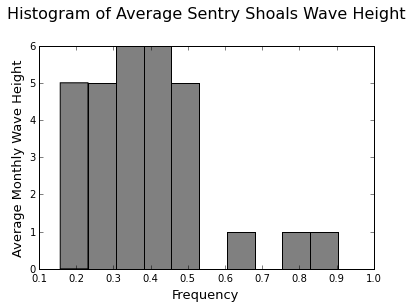

In [140]:
# Plotting a histogram for the wave height frequency over the 3 year period between November 1992 and November 1995
plt.hist(gwv_monthly_2.sig_wave_height, color='grey')

# Creating a title as well as x and y axis labels
plt.title('Histogram of Average Sentry Shoals Wave Height', y=1.1, fontsize=16)
plt.xlabel('Frequency', fontsize=13)
plt.ylabel('Average Monthly Wave Height', fontsize=13)




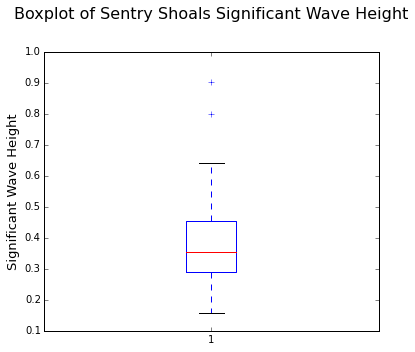

In [147]:
# Adjusting the figure size 
plt.figure(figsize=(6,5))

# Plotting a violn plot of monthly average wave height
plt.boxplot(gwv_monthly_2.sig_wave_height)

# Creating a title and y axis label fot the boxplot
plt.title('Boxplot of Sentry Shoals Significant Wave Height', y=1.1, fontsize=16)
plt.ylabel('Significant Wave Height', fontsize=13)

when I was just beginning this assignment, I tried to think about what information from this data set would benefit my final project the most. Since I already know that phytoplankton blooms rely greatly upon the vertical mixing in the water column, and that much of this vertical mixing is a result of wave power, I decided that average monthly wave height would be a useful characteristic to examine. My first plot was just a simple line graph of the average monthly wave height at Sentry Shoals. I thought this would give me an introduction to yearly trends in the wave height. However, without statistical analysis, this first line graph just showed me which months had larger average wave heights than others as opposed to identifying an annual trend. However, after examining the raw data for months of greater average wave height, I learned that most often this was caused from repeat storm events. For both December and January 1994, storm events with high wind and wave recordings seemed prevalent during these months in the raw data.  Next I wanted to visualize the distribution of average monthly wave height across the three years, so I created a histogram. This could be an important concept to perfrom when I begin to examine phtyoplankton. For instance, I would potentially be able to comment on how the yearly distribution of average monthly wave height impacts the phytoplankton for given year. Additionally, this plot has already given me insight into wave height distribution, for instance I know that wave heights at Sentry Shoals are most likely (estimating before I have doen the statistical analysis) right skewed. the final plot that I created was a boxplot. This plot adds statistical information that the histogram does not show such as the median of average monthly wave height as well as the quartile composition of the average monthly wave height. Both of these may be important when I begin a statistical analysis of phytoplankton blooms in the Nortern Strait of Georgia. 